In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [3]:
mat = scipy.io.loadmat('D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/A2/ion.mat')
train = scipy.io.loadmat('D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/A2/Ion.trin.mat')
test = scipy.io.loadmat('D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/A2/Ion.test.mat')
X_train = train['Xtrain'] #column-wise observations
Y_train = train['ytrain'] #row-wise observations
X_test = test['Xtest']
Y_test = test['ytest']

In [4]:
#sigmoid functions
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [5]:
#Weight function with n nodes for training data
    
def weight_fn(x,n):
    return np.random.rand(np.shape(x)[0], n) #makes a 33xn matrix
    
n = 1 #number of nodes

weight_1 = weight_fn(X_train,n) #33xn matrix
weight_2 = weight_fn(weight_1.T,1) #nx1 matrix
weight_1 = np.ones((33,1))
weight_2 = np.ones((1,1))

In [6]:
#Calculate output
def feedforward(x,n):
    layer_1 = np.dot(x.T, weight_1) #makes a 176 x n matrix
    active_1 = sigmoid(layer_1) #activation function on every element
    layer_2 = np.dot(active_1, weight_2) #makes a 176x1 matrix of outputs
    output = sigmoid(layer_2) #active 2
    return (layer_1, active_1, layer_2, output)

layer_1 = feedforward(X_train, n)[0]
active_1 = feedforward(X_train, n)[1]   
layer_2 = feedforward(X_train, n)[2]
output = feedforward(X_train, n)[3]

def backward_p(x, y, o, a): #o is output,a is the coefficient of weight decay
    delta_k = (y - o) # error in the output, 176x1 matrix 
    w2 = active_1.T.dot(delta_k * sigmoid_derivative(o)) + (a*weight_2) # n x 176 @ 176 x1 = n x 1 matrix
    w1 = X_train.dot(((delta_k * sigmoid_derivative(o)).dot(weight_2.T)) * sigmoid_derivative(active_1)) + (a*weight_1)#33x176 @ 176x1 @ 1xn =33xn matrix
    return (w1, w2)

In [7]:
#Convergence for training data at n = 1
for i in range(3000):
    n = 1 
    layer_1 = feedforward(X_train, n)[0]
    active_1 = feedforward(X_train, n)[1]   
    layer_2 = feedforward(X_train, n)[2]
    output = feedforward(X_train, n)[3]
    weight_1 += backward_p(X_train, Y_train, output,0)[0]
    weight_2 += backward_p(X_train, Y_train, output,0)[1]

In [8]:
output = feedforward(X_train, n)[3]
output = np.rint(output*2)
count = 0
for i in range(176):
    if output[i] == Y_train[i]:
        count +=1
    
error_training = 1 - count/176

#Applying weights to test data
output_test = feedforward(X_test, n)[3]
output_test = np.rint(output_test*2)
count = 0
for i in range(175):
    if output_test[i] == Y_test[i]:
        count +=1
    
error_test = 1 - count/176

In [9]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for i in range(176):
    if output[i] == Y_train[i] == 1:
        a1 += 1
    if output[i] == 0 and Y_train[i] == 1:
        a2 += 1
    if output[i] == 1 and Y_train[i] == 0:
        a3 += 1
    if output[i] == 0 and Y_train[i] == 0:
        a4 +=1
Q2D1 = np.array([[a1, a2], [a3,a4]])

In [10]:
b1 = 0
b2 = 0
b3 = 0
b4 = 0
for i in range(175):
    if output_test[i] == Y_test[i] == 1:
        b1 += 1
    if output_test[i] == 0 and Y_test[i] == 1:
        b2 += 1
    if output_test[i] == 1 and Y_test[i] == 0:
        b3 += 1
    if output_test[i] == 0 and Y_test[i] == 0:
        b4 +=1

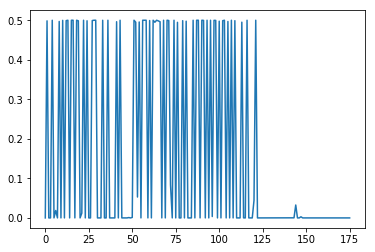

In [11]:
Q2D2 = np.array([[b1, b2], [b3,b4]])
#%% Plot of data
y = []
for i in range(176):
    y.append(feedforward(X_train, n)[3][i])
x = list(range(176))
plt.figure()
plt.plot(x,y)

In [12]:
#Q2B
#test for a = 1 with 1 node
error_test = []
error_train = []
epoch_count = []
n = 1
weight_1 = weight_fn(X_train,n) 
weight_2 = weight_fn(weight_1.T,1)
for i in range(1000): #iteratively count the weights for each node
    epoch_count.append(i+1)
    layer_1 = feedforward(X_train, n)[0]
    active_1 = feedforward(X_train, n)[1]   
    layer_2 = feedforward(X_train, n)[2]
    output = feedforward(X_train, n)[3]
    weight_1 += backward_p(X_train, Y_train, output, 1)[0]
    weight_2 += backward_p(X_train, Y_train, output, 1)[1]
    output = feedforward(X_train, n)[3] #get the output of the iteration
    output = np.rint(output*2) #convert to [0,1] bounds
    output_test = output_test = feedforward(X_test, n)[3]
    output_test = np.rint(output_test*2)
    count = 0
    for i in range(176): #get the error for training
        if output[i] == Y_train[i]:
            count += 1
    error_train.append(1 - count/176)
    count_test = 0
    for i in range(175): #get the error for test
        if output_test[i] == Y_test[i]:
            count_test += 1
    error_test.append(1 - count_test/175)

Text(0.5, 1.0, 'a = 1, 1 node')

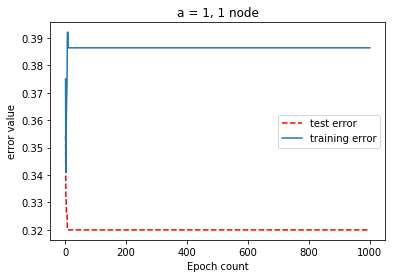

In [13]:

plt.figure()
plt.plot(epoch_count, error_test, 'r--', label = 'test error')
plt.plot(epoch_count, error_train, label = 'training error')
plt.xlabel('Epoch count')
plt.ylabel('error value')
plt.legend()
plt.title('a = 1, 1 node')

Text(0.5, 1.0, 'a = 0.15, 1 node')

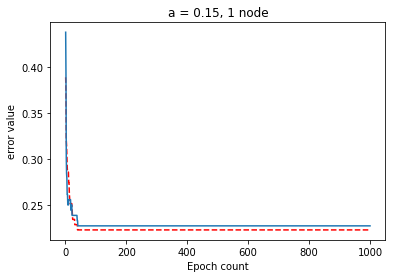

In [14]:
#Q2B
#test for a = 0.15 with 1 node
error_test = []
error_train = []
epoch_count = []
n = 1
weight_1 = weight_fn(X_train,n) 
weight_2 = weight_fn(weight_1.T,1)
for i in range(1000): #iteratively count the weights for each node
    epoch_count.append(i+1)
    layer_1 = feedforward(X_train, n)[0]
    active_1 = feedforward(X_train, n)[1]   
    layer_2 = feedforward(X_train, n)[2]
    output = feedforward(X_train, n)[3]
    weight_1 += backward_p(X_train, Y_train, output, 0.15)[0]
    weight_2 += backward_p(X_train, Y_train, output, 0.15)[1]
    output = feedforward(X_train, n)[3] #get the output of the iteration
    output = np.rint(output*2) #convert to [0,1] bounds
    output_test = output_test = feedforward(X_test, n)[3]
    output_test = np.rint(output_test*2)
    count = 0
    for i in range(176): #get the error for training
        if output[i] == Y_train[i]:
            count += 1
    error_train.append(1 - count/176)
    count_test = 0
    for i in range(175): #get the error for test
        if output_test[i] == Y_test[i]:
            count_test += 1
    error_test.append(1 - count_test/175)


plt.figure()
plt.plot(epoch_count, error_test, 'r--', label = 'test error')
plt.plot(epoch_count, error_train, label = 'training error')
plt.xlabel('Epoch count')
plt.ylabel('error value')
plt.legend
plt.title('a = 0.15, 1 node')

Text(0.5, 1.0, 'a = 0.05, 3 nodes')

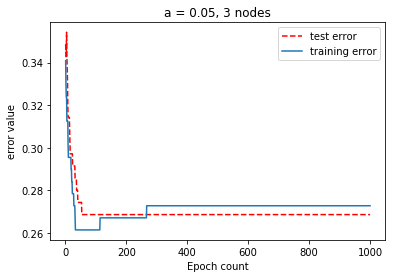

In [16]:
#Q2B
#test for a = 0.05 with 3 node
error_test = []
error_train = []
epoch_count = []
n = 3
weight_1 = weight_fn(X_train,n) 
weight_2 = weight_fn(weight_1.T,1)
for i in range(1000): #iteratively count the weights for each node
    epoch_count.append(i+1)
    layer_1 = feedforward(X_train, n)[0]
    active_1 = feedforward(X_train, n)[1]   
    layer_2 = feedforward(X_train, n)[2]
    output = feedforward(X_train, n)[3]
    weight_1 += backward_p(X_train, Y_train, output, 0.05)[0]
    weight_2 += backward_p(X_train, Y_train, output, 0.05)[1]
    output = feedforward(X_train, n)[3] #get the output of the iteration
    output = np.rint(output*2) #convert to [0,1] bounds
    output_test = output_test = feedforward(X_test, n)[3]
    output_test = np.rint(output_test*2)
    count = 0
    for i in range(176): #get the error for training
        if output[i] == Y_train[i]:
            count += 1
    error_train.append(1 - count/176)
    count_test = 0
    for i in range(175): #get the error for test
        if output_test[i] == Y_test[i]:
            count_test += 1
    error_test.append(1 - count_test/175)
plt.figure()
plt.plot(epoch_count, error_test, 'r--', label = 'test error')
plt.plot(epoch_count, error_train, label = 'training error')
plt.xlabel('Epoch count')
plt.ylabel('error value')
plt.legend()
plt.title('a = 0.05, 3 nodes')

Text(0.5, 1.0, 'a = 0.01, 2 nodes')

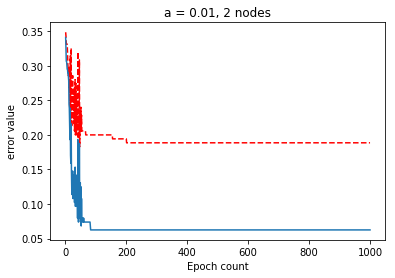

In [17]:
#test for a = 1 with 2 node
error_test = []
error_train = []
epoch_count = []
n = 2
weight_1 = weight_fn(X_train,n) 
weight_2 = weight_fn(weight_1.T,1)

for i in range(1000): #iteratively count the weights for each node
    epoch_count.append(i+1)
    layer_1 = feedforward(X_train, n)[0]
    active_1 = feedforward(X_train, n)[1]   
    layer_2 = feedforward(X_train, n)[2]
    output = feedforward(X_train, n)[3]
    weight_1 += backward_p(X_train, Y_train, output, 0.01)[0]
    weight_2 += backward_p(X_train, Y_train, output, 0.01)[1]
    output = feedforward(X_train, n)[3] #get the output of the iteration
    output = np.rint(output*2) #convert to [0,1] bounds
    output_test = output_test = feedforward(X_test, n)[3]
    output_test = np.rint(output_test*2)
    count = 0
    for i in range(176): #get the error for training
        if output[i] == Y_train[i]:
            count += 1
    error_train.append(1 - count/176)
    count_test = 0
    for i in range(175): #get the error for test
        if output_test[i] == Y_test[i]:
            count_test += 1
    error_test.append(1 - count_test/175)


plt.figure()
plt.plot(epoch_count, error_test, 'r--', label = 'test error')
plt.plot(epoch_count, error_train, label = 'training error')
plt.xlabel('Epoch count')
plt.ylabel('error value')
plt.legend
plt.title('a = 0.01, 2 nodes')

Text(0.5, 1.0, '')

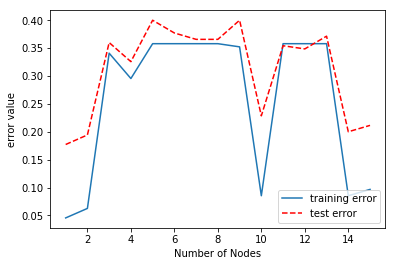

In [18]:
#Q2C  with no weight decay
error_test = []
error_train = []
node_count = []
for i in range(15): #testing up to 15 nodes
    n = i + 1
    weight_1 = weight_fn(X_train,n) 
    weight_2 = weight_fn(weight_1.T,1) 
    for i in range(1000): #iteratively count the weights for each node
        layer_1 = feedforward(X_train, n)[0]
        active_1 = feedforward(X_train, n)[1]   
        layer_2 = feedforward(X_train, n)[2]
        output = feedforward(X_train, n)[3]
        weight_1 += backward_p(X_train, Y_train, output, 0)[0]
        weight_2 += backward_p(X_train, Y_train, output, 0)[1] 
    output = feedforward(X_train, n)[3]
    output = np.rint(output*2)
    output_test = output_test = feedforward(X_test, n)[3]
    output_test = np.rint(output_test*2)
    count = 0
    for i in range(176): #get the error for training
        if output[i] == Y_train[i]:
            count += 1
    error_train.append(1 - count/176)
    count_test = 0
    for i in range(175): #get the error for test
        if output_test[i] == Y_test[i]:
            count_test += 1
    error_test.append(1 - count_test/175)
    node_count.append(n)
    
plt.figure()
plt.plot(node_count, error_train, label = 'training error' )
plt.plot(node_count, error_test, 'r--', label = 'test error')
plt.xlabel('Number of Nodes')
plt.ylabel('error value')
plt.legend()
plt.title('')